In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [32]:
S= "HOG"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("..//model_data//"+S+".csv")

In [33]:
df= pd.read_csv("..//model_data//"+S+".csv",index_col="Date",parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-02,24.633370,25.069711,24.387434,24.911041,1751500
2010-11-03,25.045910,25.379115,24.823774,25.315647,2531600
2010-11-04,25.696455,26.585001,25.601255,26.497736,2813500
2010-11-05,26.592940,26.767477,26.370804,26.680208,1754000
2010-11-08,26.267667,26.267667,25.482254,25.720257,3796400


In [34]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-11-02 to 2020-11-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2518 non-null   float64
 1   High    2518 non-null   float64
 2   Low     2518 non-null   float64
 3   Close   2518 non-null   float64
 4   Volume  2518 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


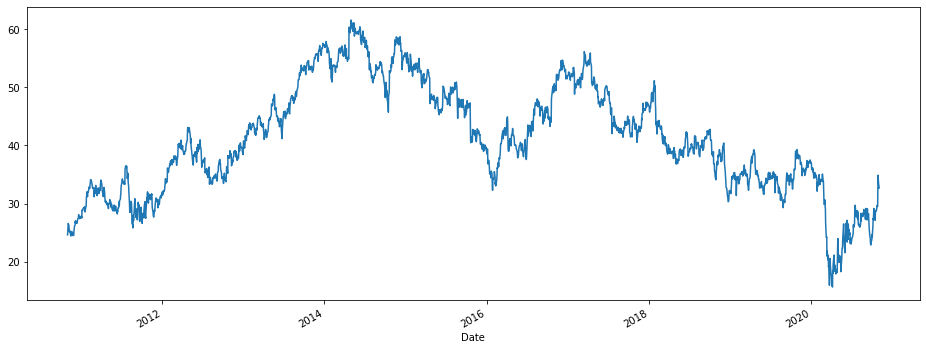

In [36]:
df['Open'].plot(figsize=(16,6))

In [37]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [38]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [39]:
X_train = []
y_train = []
for i in range(60, len(training_df)-4):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i+4, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
X_train.shape

(1950, 60, 1)

In [41]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
# Initialising the RNN
regressor = Sequential()

In [44]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [45]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1950/1950 [==============================] - 8s 4ms/step - loss: 0.0279
Epoch 2/100
1950/1950 [==============================] - 7s 4ms/step - loss: 0.0087
Epoch 3/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0085
Epoch 4/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0082
Epoch 5/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0068
Epoch 6/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0063
Epoch 7/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0067
Epoch 8/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0065
Epoch 9/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0058
Epoch 10/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0063
Epoch 11/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0059
Epoch 12/100
1950/1950 [==============================] - 9s 4ms/step - lo

1950/1950 [==============================] - 8s 4ms/step - loss: 0.0025
Epoch 98/100
1950/1950 [==============================] - 8s 4ms/step - loss: 0.0028
Epoch 99/100
1950/1950 [==============================] - 8s 4ms/step - loss: 0.0026
Epoch 100/100
1950/1950 [==============================] - 8s 4ms/step - loss: 0.0025


# Testing

In [46]:
X_test = []
y_test = []
for i in range(60, len(testing_df)-4):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i+4, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
predicted_stock_price = regressor.predict(X_test)

In [49]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(440, 1)

In [50]:
y_test

array([[ 2.73573593e-01],
       [ 2.60586695e-01],
       [ 2.41488359e-01],
       [ 2.43016212e-01],
       [ 2.60841346e-01],
       [ 2.59568128e-01],
       [ 2.64151643e-01],
       [ 2.86815048e-01],
       [ 2.89616131e-01],
       [ 2.85541896e-01],
       [ 2.90125478e-01],
       [ 2.97510050e-01],
       [ 2.95727666e-01],
       [ 2.95472813e-01],
       [ 2.77393297e-01],
       [ 2.90125447e-01],
       [ 2.96236859e-01],
       [ 3.10751509e-01],
       [ 3.04131039e-01],
       [ 3.28831341e-01],
       [ 3.10751572e-01],
       [ 2.87069562e-01],
       [ 3.06168064e-01],
       [ 2.98783236e-01],
       [ 2.81619701e-01],
       [ 2.77760710e-01],
       [ 2.79818845e-01],
       [ 2.87279689e-01],
       [ 2.78275190e-01],
       [ 2.75445336e-01],
       [ 2.38656366e-01],
       [ 2.40971701e-01],
       [ 2.11643523e-01],
       [ 2.22963274e-01],
       [ 2.41228967e-01],
       [ 2.55121357e-01],
       [ 2.64125605e-01],
       [ 2.69785396e-01],
       [ 2.9

In [51]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [52]:
predicted_stock_price

array([[32.817413],
       [33.33449 ],
       [33.98041 ],
       [34.252613],
       [34.417416],
       [34.50964 ],
       [34.40822 ],
       [34.071114],
       [33.86284 ],
       [34.050224],
       [34.2462  ],
       [34.394268],
       [34.78897 ],
       [35.129272],
       [35.239655],
       [35.323044],
       [35.49775 ],
       [35.60362 ],
       [35.63751 ],
       [35.373253],
       [35.325974],
       [35.450855],
       [35.75495 ],
       [35.845013],
       [36.19566 ],
       [36.19108 ],
       [35.742153],
       [35.6845  ],
       [35.67018 ],
       [35.391514],
       [35.093628],
       [34.949566],
       [35.006355],
       [34.941864],
       [34.81457 ],
       [34.21452 ],
       [33.77295 ],
       [33.18632 ],
       [32.926414],
       [33.11992 ],
       [33.542736],
       [33.962086],
       [34.29082 ],
       [34.83384 ],
       [35.641365],
       [36.34994 ],
       [37.008987],
       [37.696346],
       [38.14879 ],
       [37.8533  ],


In [53]:
actual_stock_price.shape

(440, 1)

In [54]:
predicted_stock_price.shape

(440, 1)

In [55]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))

2.1400565273259935

In [56]:
df = pd.read_csv("..//model_data//"+S+".csv",index_col="Date",parse_dates=True)
df= df[['Open']]
df= df[int(len(df)*(4/5))+64:]
pred_df=pd.DataFrame(predicted_stock_price)
df['Open2']= predicted_stock_price

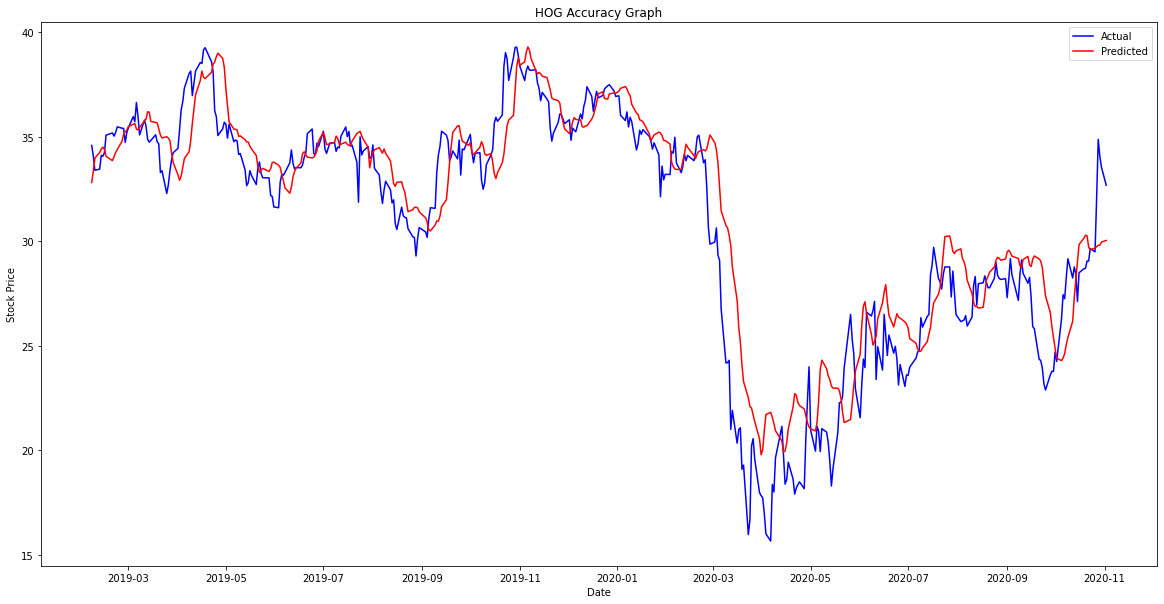

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['Actual','Predicted'])
plt.savefig("..//model_data//"+S+'_accuracy_graph.png')

In [58]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

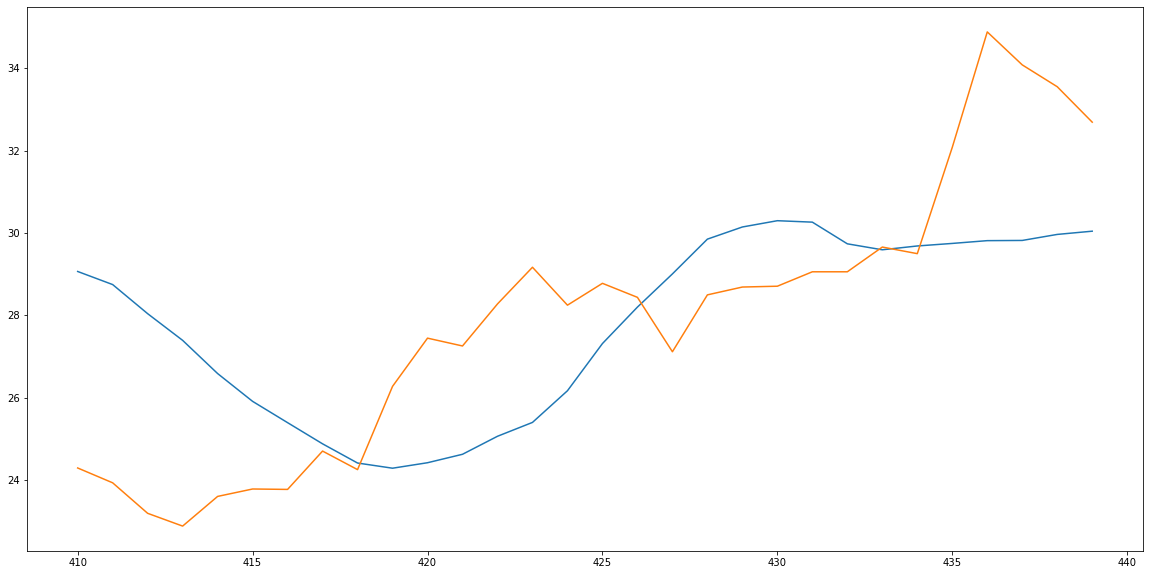

In [59]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [60]:
import pickle
Pkl_Filename = "..//model_data//"+S+"_Model.pkl"  
sc_file= "..//model_data//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)